<a href="https://colab.research.google.com/github/komalchilke/cpp-programs/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print('komal chilke')
print('BE21F06F014')
dataset = pd.read_csv("/content/drive/MyDrive/KNN_Dataset.csv",
index_col=0)
dataset.head ()


komal chilke
BE21F06F014


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
#Seperaate features and target
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]
print("Features: \n", X)
print("Target: \n", y)


Features: 
           WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0    0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1    0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2    0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3    1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4    1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240  0.746811   
996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540  1.055928   
997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738  0.386802   
998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859  0.855806   
999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762  0.778234   

          PJF       HQE       NXJ  
0    0.643798  0.879422  1.

In [ ]:
# Data standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaler.fit(X)
scaled_features = scaler.transform (X)
from tables import Column
scaled_dataset = pd.DataFrame(scaled_features)
#scaled_dataset= pd.DataFrame (scaled_features, columns=dataset.columns[:-1])
scaled_dataset.head ()

,0,1,2,3,4,5,6,7,8,9
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.30)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors=1)
knn.fit (X_train, y_train)
pred = knn. predict (X_test)
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix (y_test, pred))

[[131  14]
 [ 13 142]]


In [ ]:
print (classification_report (y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       142
           1       0.91      0.93      0.92       158

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



Text(0, 0.5, 'Error Rate')

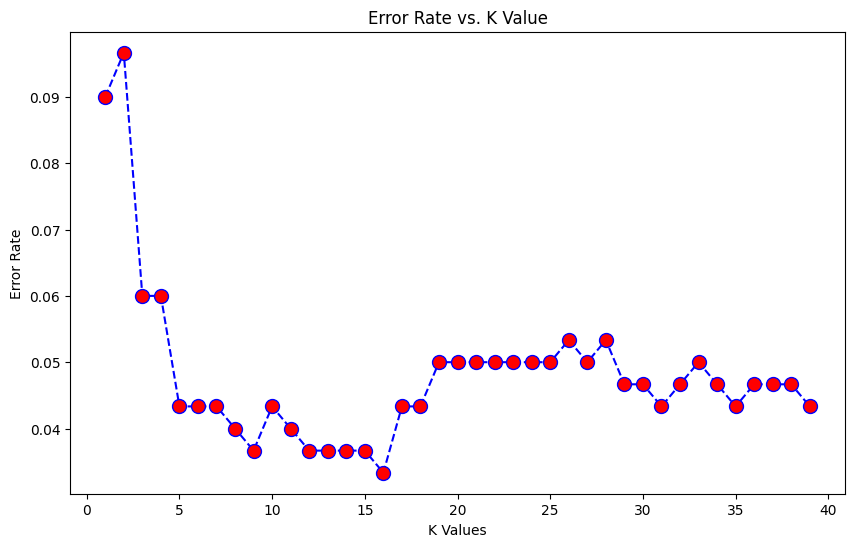

In [ ]:
error_rate = []
# Will take some time
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
#Plot 'k' Vs Error
plt.figure(figsize=(10,6))
plt.plot(range (1,40), error_rate, color='blue', linestyle= 'dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Values')
plt.ylabel('Error Rate')

In [ ]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn. fit (X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=1')
print('\n')
print (confusion_matrix (y_test, pred))
print('\n')
print (classification_report (y_test, pred))


WITH K=1


[[127  15]
 [ 11 147]]


              precision    recall  f1-score   support

           0       0.92      0.89      0.91       142
           1       0.91      0.93      0.92       158

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [ ]:
# NOW WITH K=25
knn = KNeighborsClassifier (n_neighbors=25)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('WITH K=25')
print('\n')
print(confusion_matrix (y_test, pred))
print('\n')
print(classification_report (y_test,pred))

WITH K=25


[[126  16]
 [  2 156]]


              precision    recall  f1-score   support

           0       0.98      0.89      0.93       142
           1       0.91      0.99      0.95       158

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
# NOW WITH K=21
knn = KNeighborsClassifier (n_neighbors=21)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('WITH K=21')
print('\n')
print(confusion_matrix (y_test, pred))
print('\n')
print(classification_report (y_test,pred))

WITH K=21


[[135  10]
 [  5 150]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.95       145
           1       0.94      0.97      0.95       155

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section